<a href="https://colab.research.google.com/github/TrushaT/DS-Assignment-/blob/main/DS_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group: Akshat Bhat(2018130003), Trusha Talati(2018130054) 

# Tutorial on OCR using pytesseract library with an example application (Domain - Computer Vision)


## Introduction
The detection of text from images remains an important part of the applications of Computer Vision which includes image segmentation, object detection etc. Over the past few years, Optical Character Recognition (OCR) has been a major application of Computer Vision. OCR identifies text from a written or printed text document and converts it into machine-encoded text. OCR can be used to recognise text from a scanned document, a photo of a document, a scene photo or from subtitle text superimposed on an image.

The aim of this tutorial is to provide a step-by-step guide on how to apply OCR to images using pytesseract and OpenCV, along with an example application to further illustrate the application of OCR.


## Tutorial content

In this tutorial, we go through the various steps involved in the process of using OCR by making use of the pytesseract python library (https://pypi.org/project/pytesseract/) along with OpenCV, an image processing python library (https://opencv.org/).

We will be using data collected from the Stanford Mobile Visual Search Data Set: Business Cards.

We will cover the following topics in this tutorial:

- Installing the libraries
- Performing basic operations using OpenCV
- Using pytesseract for Text Localization, Detection and Recognition
- Example application: Applying OCR to Business Card images

### Installing the libraries

Before getting started, you'll need to install the various libraries that we will use. You can install OpenCV and pytesseract using pip:

In [ ]:
!pip install opencv-contrib-python

In [ ]:
!pip install pytesseract

We need to also mount our Google Drive as we are using Google Colaboratory for this tutorial.

In [ ]:
from google.colab import drive # mounting google drive which contains the dataset 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DS Assignment

/content/drive/.shortcut-targets-by-id/1I_l_bIEsLC20zJ6eQbUT42XgcH6f9ToH/DS Assignment


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/.shortcut-targets-by-id/1I_l_bIEsLC20zJ6eQbUT42XgcH6f9ToH/DS Assignment'

### Performing basic operations using OpenCV

OpenCV is a programming library geared mostly at real-time computer vision. It was created by Intel and then sponsored by Willow Garage and Itseez. OpenCV is an excellent tool for image processing and computer vision. It's an open-source library for tasks including face detection, objection tracking, landmark detection, and more. Let us have a look at some basic operations:

#### 1. Reading and Displaying an image

To read an image cv2.imread() method is used. This method loads an image from the specified file.

To display an image plt.imshow() method is used. This method displays an image as an output.

In [499]:
orig = cv2.imread('business_cards/Canon/022.jpg') # reads image and converts to array
print(orig)

[[[ 18  25  44]
  [ 17  24  43]
  [ 18  25  44]
  ...
  [ 80 161 196]
  [ 83 161 197]
  [ 83 161 197]]

 [[ 19  26  45]
  [ 18  25  44]
  [ 18  25  44]
  ...
  [ 80 161 196]
  [ 83 161 197]
  [ 84 162 198]]

 [[ 19  26  45]
  [ 18  25  44]
  [ 17  24  43]
  ...
  [ 81 162 197]
  [ 83 161 197]
  [ 83 161 197]]

 ...

 [[ 23  26  34]
  [ 24  27  35]
  [ 25  28  36]
  ...
  [ 77  86 100]
  [ 74  83  97]
  [ 73  82  96]]

 [[ 23  26  34]
  [ 24  27  35]
  [ 25  28  36]
  ...
  [ 77  86 100]
  [ 75  84  98]
  [ 74  83  97]]

 [[ 21  24  32]
  [ 23  26  34]
  [ 24  27  35]
  ...
  [ 78  87 101]
  [ 76  85  99]
  [ 75  84  98]]]


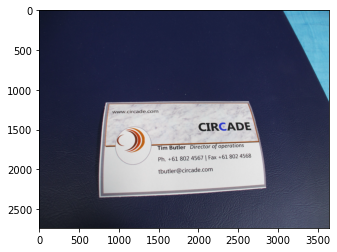

In [500]:
plt.imshow(orig) # displays image

#### 2. Grayscaling of Images
Grayscaling is the process of converting an image from other color spaces e.g. RGB, CMYK, HSV, etc. to shades of gray. It varies between complete black and complete white.

**cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)** method is used which takes the image file as the first argument and the second argument signals the conversion from BGR colour scale to gray scale.

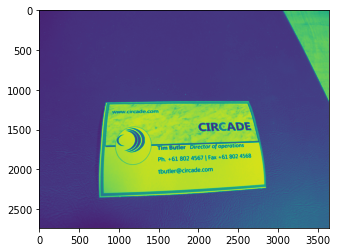

In [501]:
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

#### 3. Median Blur
**cv2.medianBlur()** computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise.

One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in
 the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

Below, we add a 50% noise to our original image and use a median filter. Check the result!

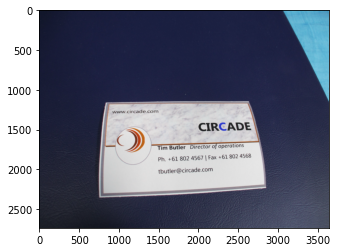

In [502]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

median = cv2.medianBlur(orig,5)

plt.imshow(median)
plt.show()

#### 4. Adaptive Thresholding

The method **cv.adaptiveThreshold** takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.

cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the
the neighbourhood pixels.

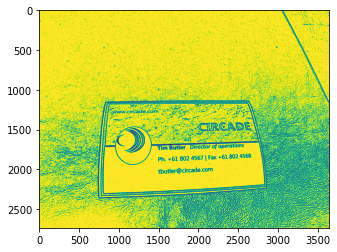

In [506]:
img = orig
img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th2)
plt.show()

### Using pytesseract for Text Localization, Detection and Recognition

Tesseract is an open-source, free software available under the Apache License. It is currently sponsored by Google and is compatible with several programming languages with the help of wrappers. Pytesseract is one such wrapper that is used for the Python programming language.

The method **pytesseract.image_to_string** is used to extract text from an image.



In [504]:
text = pytesseract.image_to_string(orig)

In [505]:
text

'www.circade.com\n\nCIRCADE |\n\n5 pence nts \\ ssc\ni ) Tim Butler Director of operations\nPh. +61 802 4567 | Fax +61 802 4568\n\ntbutler@circade.com\n\n \n\x0c'

### Example application: Applying OCR to Business Card images

We will be utilizing business cards images for demonstration over here.

Dataset - This dataset includes query and reference images for: (1) CDs, (2) DVDs, (3) books, (4) video clips, (5) landmarks, (6) business cards, (7) text documents, (8) paintings. The format is exactly as described in 2011 ACM Multimedia Systems paper. 

The pytesseract package is used to interface with the Tesseract OCR engine. We then have Python’s regular expression library, re, which will allow us to parse the names, job titles, email addresses, and phone numbers from business cards.

In [507]:
# import the necessary packages
from imutils.perspective import four_point_transform
import pytesseract
import argparse
import imutils
import cv2
import re
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [508]:
image = 'business_cards/Canon/019.jpg'

Here, we load our input --image from disk and then clone it. We make it a clone to extract the original high-resolution version of the business card after contour processing.

We then resize our image to have a width of 600px and then compute the ratio of the new width to the old width (a requirement for when we want to obtain a top-down view of the original high-resolution business card).

In [509]:
# load the input image from disk, resize it, and compute the ratio
# of the *new* width to the *old* width
orig = cv2.imread(image)
image = orig.copy()
image = imutils.resize(image, width=600)
ratio = orig.shape[1] / float(image.shape[1])

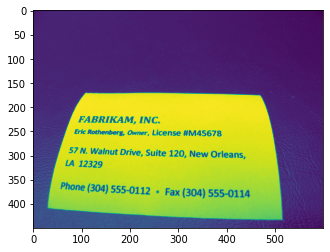

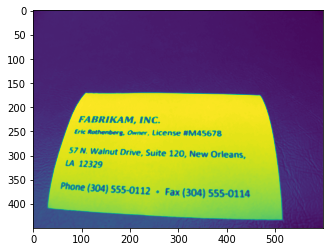

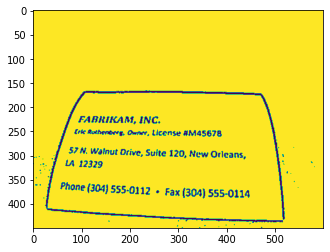

In [510]:
# convert the image to grayscale, blur it, and apply edge detection
# to reveal the outline of the business card
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

blurred = cv2.medianBlur(gray, 3)
plt.imshow(blurred)
plt.show()

edged = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
plt.imshow(edged)
plt.show()



In [511]:
# convert the business card from BGR to RGB channel ordering and then OCR it
rgb = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(rgb)

_, th_1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV) # for black backgrounds - binary - global
_, th_2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) # for white backgrounds - binary - global
text_1 = pytesseract.image_to_string(th_1)
text_2 = pytesseract.image_to_string(th_2)

length_1 = len(text_1)
length_2 = len(text_2)
if length_1 > length_2:
    text_image = text_1
else:
    text_image = text_2

text += text_image

In [512]:
text = text.strip()
print(text)

FABRIKAM, INC.

  

Erke Rotherterg, Owner, License &M45678

    

W 12329

    

57N, Walnut Drive, Suite 120, New Orleans,

Phone (304) 555-0112 « Fax (304) 555-0114
FABRIKAM, INC.
Erie Rothenberg, Owner, License #MA5678

5? N. Wainut Drive, Suite 120, New Orleans,
tA 12329

Phone (304) 555-0112 « Fax (304} 555-0114


In [513]:
# use regular expressions to parse out phone numbers and email
# addresses from the business card
phoneNums = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)
# attempt to use regular expressions to parse out names/titles (not
# necessarily reliable)
nameExp = r"^[\w'\-,.][^0-9_!¡?÷?¿/\\+=@#$%ˆ&*(){}|~<>;:[\]]{2,}"
names = re.findall(nameExp, text)

In [514]:
# show the phone numbers header
print("PHONE NUMBERS")
print("=============")
# loop over the detected phone numbers and print them to our terminal
for num in phoneNums:
	print(num.strip())
# show the email addresses header
print("\n")
print("EMAILS")
print("======")
# loop over the detected email addresses and print them to our
# terminal
for email in emails:
	print(email.strip())
# show the name/job title header
print("\n")
print("NAME/JOB TITLE")
print("==============")
# loop over the detected name/job titles and print them to our
# terminal
for name in names:
	print(name.strip())

PHONE NUMBERS
(304) 555-0112
(304) 555-0114
(304) 555-0112


EMAILS


NAME/JOB TITLE
FABRIKAM, INC.

  

Erke Rotherterg, Owner, License
